<a href="https://colab.research.google.com/github/Shreya030797/ML-Projects/blob/main/SiteSpending.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 3: Regression Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as skl
%matplotlib inline
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.0 MB 1.3 MB/s 
     |████████████████████████████████| 102 kB 7.6 MB/s 
     |████████████████████████████████| 679 kB 58.6 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 9.9 MB 60.4 MB/s 
     |████████████████████████████████| 4.7 MB 76.2 MB/s 
     |████████████████████████████████| 296 kB 69.7 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=324966 sha256=b85d72aeafc606f8ee813d723cb3b79de764137283432cbc839ed8c69c7a306e
  Stored in directory: /tmp/pip-ephem-wheel-cache-rwq1kilu/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=e539ce9c164e2b46868596b985e0321345b1c6145bafa9fcd28752311dbfe3db
  Stored in directory: /root/.cache/pip/wheels

In [ ]:
import os
os._exit(00)

In [ ]:

Data = pd.read_csv('Comp1801CourseworkData.csv')
print(Data.head())

   Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21         44.89    182.80                    9   Masters  Private sector   
4   24        614.80    194.34                    0      GCSE  Private sector   

      Sex            Region    Salary  
0    Male            London  60173.49  
1  Female        South East  42965.45  
2    Male   East of England  54924.41  
3  Female  Northern Ireland  26734.99  
4    Male          Scotland  15325.23  


In [ ]:
profile = ProfileReport(Data)

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df = pd.read_csv("Comp1801CourseworkData.csv")

# prepare NumPy ndarrays
X = np.array(df[['SiteSpending', 'Age','RecommendImpression']]) # !!!!!! Make sure you put any additional features into this array !!!!!!!!!!
y = np.array(df['Salary'])

# show the data
display(df)

n_train_points = 150
n_new_points = 50

# Split the data into training/new data
X_train = X[:n_train_points]
X_new = X[n_train_points:n_train_points+n_new_points]
X_new_disp = X_new[:,0]

# Split the targets into training/new data
y_train = y[:n_train_points]
y_true = y[n_train_points:n_train_points+n_new_points]

# Note, we don't actually have to do anything else with the model functions
# They are prefectly happy with multivariable linear regression
# Create linear regression object
obj = linear_model.LinearRegression()
# Train the model using the training sets
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_new)

# Plot the Age vs Diabetes
plt.scatter(X_new_disp, y_true,  color='black', label='y_train')
plt.scatter(X_new_disp, y_pred, color='blue', label='y_pred')
plt.xlabel('Age')
plt.ylabel('Diabetes Score')
plt.legend()
plt.show()

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(skl.mean_squared_error(y_true, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(skl.r2_score(y_true, y_pred)))

# Plot the Age vs Diabetes
plt.scatter(X_new_disp, y_true,  color='black', label='y_train')
plt.scatter(X_new_disp, y_pred, color='blue', label='y_pred')
plt.xlabel('Customer Salary')
plt.ylabel('Score')
plt.legend()
plt.show()

Age  SiteSpending  SiteTime  RecommendImpression Education  \
0     32        314.06     30.14                    0    Degree   
1     20       3758.36    149.36                    4      GCSE   
2     36        601.72     21.87                    0   Masters   
3     21         44.89    182.80                    9   Masters   
4     24        614.80    194.34                    0      GCSE   
..   ...           ...       ...                  ...       ...   
995   56        177.67    272.87                    5      GCSE   
996   54        155.42    231.17                    5     Other   
997   22       2376.10    287.15                   11     Other   
998   49       4355.04     27.78                    0    Degree   
999   51         40.43    188.38                    9       PhD   

           WorkType     Sex            Region    Salary  
0    Private sector    Male            London  60173.49  
1    Private sector  Female        South East  42965.45  
2    Private sector    Male   East of England  54924.41  
3    Private sector  Female  Northern Ireland  26734.99  
4    Private sector    Male          Scotland  15325.23  
..              ...     ...               ...       ...  
995   Public Sector  Female        North West  22306.84  
996  Private sector    Male             Wales  27704.97  
997  Private sector    Male        South East  62542.89  
998  Private sector    Male  Northern Ireland  96745.84  
999  Private sector    Male        North West  48651.47  

[1000 rows x 9 columns]

Mean squared error loss: 259040683.1789
R2 score: 0.1318


With SiteSpending Dataset we encounter a linear model.

In [ ]:
Data = pd.read_csv("Comp1801CourseworkData.csv")

X = Data['SiteSpending']
y = Data["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

X_train = np.array(X_train).reshape(len(X_train), 1)
y_train = np.array(y_train).reshape((len(y_train),1))

X_test = np.array(X_test).reshape(len(X_test), 1)
y_test = np.array(y_test).reshape(len(y_test), 1)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

print('theta_0:',model.intercept_)
print('theta_1:',model.coef_)

theta_0: [40092.86810564]
theta_1: [[7.40184134]]


In [ ]:
y_train_pred = model.predict(X_train)


plt.figure()
plt.scatter(X_train, y_train, color='Green', label="True Value")
plt.plot(X_train, y_train_pred, color='black', linewidth=2, label="Prediction")
plt.xlabel("Time Spent on the Website")
plt.ylabel("Customer Salary (pounds)")
plt.title('Prediction of Training Data')
plt.legend()
plt.show()

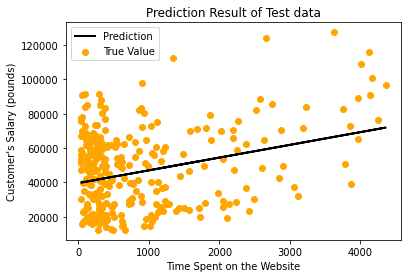

In [ ]:
y_test_pred = model.predict(X_test)

plt.figure()
plt.scatter(X_test, y_test, color='orange', label='True Value')
plt.plot(X_test, y_test_pred, color='black', linewidth=2, label='Prediction')
plt.xlabel("Time Spent on the Website")
plt.ylabel("Customer's Salary (pounds)")
plt.title('Prediction Result of Test data')
plt.legend()
plt.show()

In [ ]:
print("Mean squared error is: ", round(skl.mean_squared_error(y_test, y_test_pred), 2))
print("Explain variance score: ", round(skl.explained_variance_score(y_test, y_test_pred), 4))
print("R2 score :", round(skl.r2_score(y_test, y_test_pred), 4))


Accuracy = model.score(X_test, y_test)
print("The accuracy of the model: ", Accuracy)

Mean squared error is:  473879412.45
Explain variance score:  0.1092
R2 score : 0.1077
The accuracy of the model:  0.10772728633172557


In [ ]:
def adj_r2(x,y):
    r2 =model.score(X_test,y_test)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [ ]:
adj_r2(y_test, y_train_pred)

0.10473308259458369

Part 4: Binary Classification

In [ ]:
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import sklearn.linear_model, sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report


In [ ]:
dc = pd.read_csv('Comp1801CourseworkData.csv')
print(dc.head())

lblEncoder_X = LabelEncoder()

dc['Sex'] = lblEncoder_X.fit_transform(dc['Sex'])
dc['SiteTime'] = lblEncoder_X.fit_transform(dc['SiteTime'])

#onehotencoding
oneHotEncoder = OneHotEncoder()

onehot_enc = oneHotEncoder.fit(dc[['Education']])
OHT = onehot_enc.transform(dc[['Education']]).toarray()

dc['Education-A Level'] = OHT[:,0]
dc['Education-Degree'] = OHT[:,1]
dc['Education-GCSE'] = OHT[:,2]
dc['Education-Masters'] = OHT[:,3]
dc['Education-None'] = OHT[:,4]
dc['Education-Other'] = OHT[:,5]
dc['Education-PhD'] = OHT[:,6]

OHT2 = oneHotEncoder.fit(dc[['Region']])
OHT2 = onehot_enc.transform(dc[['Region']]).toarray()

dc['East Midlands'] = OHT2[:,0]
dc['East of England'] = OHT2[:,1]
dc['London'] = OHT2[:,2]
dc['North East'] = OHT2[:,3]
dc['North West'] = OHT2[:,4]
dc['Northern Ireland'] = OHT2[:,5]
dc['Scotland'] = OHT2[:,6]
dc['South East'] = OHT2[:,7]
dc['South West'] = OHT2[:,8]
dc['Wales'] = OHT2[:,9]
dc['West Midlands'] = OHT2[:,10]
dc['Yorkshire and The Humber'] = OHT2[:,11]


OHT3 = oneHotEncoder.fit(dc[['WorkType']])
OHT3 = onehot_enc.transform(dc[['WorkType']]).toarray()


dc['Private sector'] = OHT3[:,0]
dc['Public Sector'] = OHT3[:,1]
dc['Self Employed'] = OHT3[:,2]
dc['Unemployed'] = OHT3[:,3]

dc.head()

   Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21         44.89    182.80                    9   Masters  Private sector   
4   24        614.80    194.34                    0      GCSE  Private sector   

      Sex            Region    Salary  
0    Male            London  60173.49  
1  Female        South East  42965.45  
2    Male   East of England  54924.41  
3  Female  Northern Ireland  26734.99  
4    Male          Scotland  15325.23  


Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06        96                    0    Degree  Private sector   
1   20       3758.36       476                    4      GCSE  Private sector   
2   36        601.72        69                    0   Masters  Private sector   
3   21         44.89       597                    9   Masters  Private sector   
4   24        614.80       637                    0      GCSE  Private sector   

   Sex            Region    Salary  Education-A Level  ...  Scotland  \
0    1            London  60173.49                0.0  ...       0.0   
1    0        South East  42965.45                0.0  ...       0.0   
2    1   East of England  54924.41                0.0  ...       0.0   
3    0  Northern Ireland  26734.99                0.0  ...       0.0   
4    1          Scotland  15325.23                0.0  ...       1.0   

   South East  South West  Wales  West Midlands  Yorkshire and The Humber  \
0         0.0         0.0    0.0            0.0                       0.0   
1         1.0         0.0    0.0            0.0                       0.0   
2         0.0         0.0    0.0            0.0                       0.0   
3         0.0         0.0    0.0            0.0                       0.0   
4         0.0         0.0    0.0            0.0                       0.0   

   Private sector  Public Sector  Self Employed  Unemployed  
0             1.0            0.0            0.0         0.0  
1             1.0            0.0            0.0         0.0  
2             1.0            0.0            0.0         0.0  
3             1.0            0.0            0.0         0.0  
4             1.0            0.0            0.0         0.0  

[5 rows x 32 columns]

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.73      0.81        83
           1       0.83      0.94      0.88       117

    accuracy                           0.85       200
   macro avg       0.87      0.84      0.85       200
weighted avg       0.86      0.85      0.85       200

Precision of the data: 0.85431654676259
Accuracy : 0.85
Precision : 0.85431654676259
Recall : 0.9241245136186771
F1 score : 0.8878504672897197
Classification Report:


              precision    recall  f1-score   support

           0       0.84      0.72      0.77       286
           1       0.85      0.92      0.89       514

    accuracy                           0.85       800
   macro avg       0.85      0.82      0.83       800
weighted avg       0.85      0.85      0.85       800



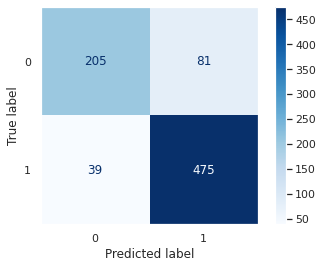

In [ ]:
dc.loc[dc['Salary'] > 35000, 'target'] = '1'
dc.loc[dc['Salary'] <= 35000, 'target'] = '0'

new_data = dc.copy()

new_data = new_data.drop(columns=['RecommendImpression','Education','WorkType','Region'])


X_train, X_test, y_train, y_test = train_test_split(new_data.drop('target', axis = 1), new_data['target'] , test_size=0.2, random_state=100)

X_train.shape
y_train.shape

LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

print("Classification Report")
print(classification_report(y_test, y_pred))

y_train_pred = cross_val_predict(LR, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

CF = ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred))
CF.plot(cmap=plt.cm.Blues)
plt.grid(False)

Ptest = precision_score(y_train, y_train_pred, pos_label='1')
print('Precision of the data:', Ptest)


Acc = accuracy_score(y_train, y_train_pred)
print('Accuracy :', Acc)
Pscore = precision_score(y_train, y_train_pred, pos_label='1')
print('Precision :', Pscore)
Reca = recall_score(y_train, y_train_pred, pos_label='1')
print('Recall :', Reca)
F1_valid = f1_score(y_train, y_train_pred, pos_label='1')
print('F1 score :', F1_valid)

print("Classification Report:")
print("\n")
print(classification_report(y_train, y_train_pred))

   Age  SiteSpending  SiteTime  RecommendImpression Education        WorkType  \
0   32        314.06     30.14                    0    Degree  Private sector   
1   20       3758.36    149.36                    4      GCSE  Private sector   
2   36        601.72     21.87                    0   Masters  Private sector   
3   21         44.89    182.80                    9   Masters  Private sector   
4   24        614.80    194.34                    0      GCSE  Private sector   

      Sex            Region    Salary  
0    Male            London  60173.49  
1  Female        South East  42965.45  
2    Male   East of England  54924.41  
3  Female  Northern Ireland  26734.99  
4    Male          Scotland  15325.23  


<ipython-input-82-28affd8944fb>:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Rfc.fit(x_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.9533333333333334


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Confusion Matrix : [[101  10]
 [  4 185]]


Classification Report :               precision    recall  f1-score   support

           0       0.96      0.91      0.94       111
           1       0.95      0.98      0.96       189

    accuracy                           0.95       300
   macro avg       0.96      0.94      0.95       300
weighted avg       0.95      0.95      0.95       300



All AUC Scores : [0.99 0.89 0.96 0.91 0.93 0.94 0.92 0.94 0.9  0.95]


Mean AUC Score - Random Forest:  0.933


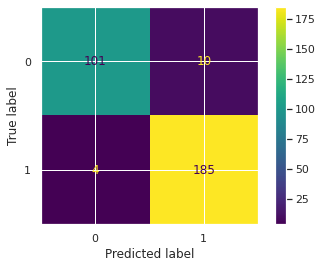

In [ ]:
import pandas as pd
import numpy as np

import sklearn.metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

dc = pd.read_csv('Comp1801CourseworkData.csv')
print(dc.head())

dc['Salary'] = (dc['Salary'] > 34999).astype(int)

X = pd.DataFrame([dc['Age'], dc['RecommendImpression'],dc['SiteSpending']])
y = pd.DataFrame(dc.Salary)

X = X.T
X.shape[0]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Rfc = RandomForestClassifier()  #Implementing Random forest
Rfc.fit(x_train, y_train)

Rfc.predict([[44,1,2]])

y_pred = Rfc.predict(x_test)

print("Accuracy:",sklearn.metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

scoring = ['precision', 'recall', 'f1']

cross_score = cross_val_score(Rfc, X, y, cv=10)

print("Confusion Matrix :", confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report :", classification_report(y_test, y_pred))
print('\n')
print("All AUC Scores :", cross_score)
print('\n')
print("Mean AUC Score - Random Forest: ", cross_score.mean())

fig, ax = plt.subplots(figsize=(6, 4))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, labels=Rfc.classes_, ax=ax
)
plt.show()

Part 5: Neural Network

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Part 3: Neural Network

In [ ]:
from tensorflow.keras.activations import sigmoid, linear, relu # Activation functions we will use
from tensorflow.keras.models import Model, Sequential # Different mays of constructing models, we will primarily be covering the 'functional api' which uses `Model`
from tensorflow.keras.optimizers import SGD # We will be using the SGD optimiser today, though there are other options you may want to explore (such as Adam)
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy  # We will be using TFs MSE loss function for regression and BinaryCross Entropy for classification.
from tensorflow.keras.layers import Input, Dense, Dropout # The layers we will be using to construct our network.
from tensorflow.keras.regularizers import L1, L2 # Regularisation being used in model layers
from tensorflow.keras.metrics import BinaryAccuracy # Accuracy Metric for classification
from tensorflow.keras.callbacks import EarlyStopping # Allows Early Stopping regularisation method.

In [ ]:
a = new_data.drop(['Salary','target'], axis = 1)
b = new_data["target"]

ab_con = pd.concat([a, b], axis=1)
#display(ab_con)

a_raw = a.to_numpy()
b_train = b.to_numpy()

LE = LabelEncoder()
b_transform = LE.fit_transform(b_train)

a_nontest_raw, a_test_raw, b_nontest, b_test = train_test_split(a_raw, b_train, test_size=0.20, shuffle=True, random_state=0)
a_train_raw, a_valid_raw, b_train, b_valid = train_test_split(a_nontest_raw, b_nontest, test_size=0.25, shuffle=True, random_state=0)

scaler = StandardScaler()
scaler.fit(a_train_raw)
a_train = scaler.transform(a_train_raw)  #training data
a_valid = scaler.transform(a_valid_raw)  #validation data
a_test = scaler.transform(a_test_raw)    #testing data

print(a_train.shape)
print(a_valid.shape)
print(a_test.shape)

(600, 27)
(200, 27)
(200, 27)


In [ ]:
alpha = 0.03
kernel_regularizer = L2(l2=alpha)

DenseLayer1 = Dense(units=5, activation=relu, kernel_regularizer=kernel_regularizer)
DenseLayer2 = Dense(units=5, activation=relu, kernel_regularizer=kernel_regularizer)
DenseLayer3 = Dense(units=5, activation=relu, kernel_regularizer=kernel_regularizer)


OutputLayer = Dense(units=1, activation=sigmoid, kernel_regularizer=kernel_regularizer)

Vinput = Input(shape=a_train.shape[1:]) #"Virtual Input"

Voutput = DenseLayer1(Vinput)   #"Virtual Outputs"
Voutput = DenseLayer2(Vinput)
Voutput = DenseLayer3(Vinput)

Voutput = OutputLayer(Voutput)

# Define the neural network model.
NNmodel = Model(inputs=[Vinput], outputs=[Voutput], name='logistic_regression')

NNmodel.summary()



Model: "logistic_regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 27)]              0         
                                                                 
 dense_30 (Dense)            (None, 5)                 140       
                                                                 
 dense_31 (Dense)            (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import SGD

GradientDecent = SGD(learning_rate=0.01)
C_Entropy = BinaryCrossentropy()
Acc = BinaryAccuracy()
NNmodel.compile(optimizer=GradientDecent, loss=C_Entropy, metrics=[Acc])


In [ ]:
history = NNmodel.fit(a_train, b_train, batch_size=1000, epochs=100, validation_data=(a_valid, b_valid))

plt.plot(history.history['loss'], label='MSE')
plt.plot(history.history['val_loss'], label = 'val_MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(loc='lower right')


Epoch 1/100


UnimplementedError: ignored

In [ ]:
C_test, Acc_test = NNmodel.evaluate(a_test, b_test)
print('The cross entropy loss :', C_test)
print('The accuracy :', Acc_test)

b_test_logit = NNmodel.predict(a_test)

b_test_pred = (b_test_logit > 0.5).astype(int)

disp = ConfusionMatrixDisplay(confusion_matrix(b_test, b_test_pred))
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)

acchype_test = accuracy_score(b_test, b_test_pred)
f1hype_test = f1_score(b_test, b_test_pred, pos_label=1)
print('The accuracy on selected hyperparameter:', acchype_test)
print('The F1 score on selected hyperparameter:', f1hype_test)
pre_test = precision_score(b_test, b_test_pred, pos_label=1)
print('Precision:', pre_test)
reca_test = precision_score(b_test, b_test_pred, pos_label=1)
print('Recall:', reca_test)

UnimplementedError: ignored

Part 6: Clustering

array([6, 3, 6, 1, 5, 1, 3, 3, 3, 3, 6, 1, 5, 0, 0, 3, 5, 3, 1, 5, 6, 3,
       3, 6, 5, 1, 0, 3, 1, 3, 6, 6, 2, 5, 5, 5, 0, 3, 3, 2, 5, 3, 3, 1,
       1, 6, 3, 5, 0, 0, 5, 5, 6, 0, 3, 4, 5, 6, 3, 1, 3, 6, 1, 3, 3, 1,
       0, 1, 4, 6, 1, 3, 1, 3, 5, 6, 6, 5, 5, 1, 6, 1, 5, 3, 3, 2, 1, 0,
       1, 6, 5, 5, 3, 6, 3, 5, 1, 3, 3, 1, 5, 6, 1, 1, 0, 5, 1, 5, 5, 6,
       1, 3, 1, 1, 2, 4, 1, 0, 1, 3, 6, 1, 1, 4, 0, 1, 1, 6, 5, 1, 1, 6,
       6, 5, 5, 5, 5, 5, 3, 3, 4, 6, 6, 2, 1, 1, 1, 1, 3, 1, 1, 5, 3, 1,
       1, 5, 6, 6, 0, 3, 6, 0, 0, 1, 5, 1, 5, 3, 5, 6, 6, 5, 5, 3, 3, 0,
       3, 5, 1, 1, 3, 3, 3, 6, 1, 1, 3, 3, 5, 3, 3, 0, 3, 0, 5, 0, 3, 5,
       3, 6, 5, 1, 5, 5, 0, 1, 6, 3, 5, 3, 3, 3, 6, 5, 3, 1, 2, 0, 3, 2,
       5, 3, 5, 5, 3, 1, 6, 6, 6, 3, 0, 3, 0, 0, 5, 5, 1, 2, 3, 3, 6, 1,
       5, 5, 6, 1, 5, 1, 3, 1, 3, 2, 3, 1, 1, 2, 6, 5, 6, 1, 3, 5, 5, 5,
       6, 6, 5, 5, 6, 1, 3, 1, 3, 1, 3, 3, 5, 5, 0, 1, 6, 5, 0, 6, 5, 3,
       6, 1, 0, 6, 1, 1, 3, 6, 1, 1, 2, 0, 5, 5, 1,

array([[  1420.39153061,  74539.45785714],
       [   858.80527027,  32897.49684685],
       [  2050.50122449,  92450.03142857],
       [   821.9418593 ,  48398.01180905],
       [  2291.95571429, 120737.87857143],
       [   548.51674107,  20352.14982143],
       [   934.17494845,  60851.95845361]])

Text(0.5, 1.0, 'Group of Customers based on Salary and Site Spending')

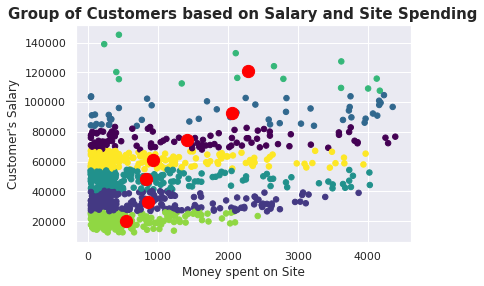

In [ ]:
from sklearn.cluster import KMeans
cluster_model = KMeans(n_clusters=7)  #creating clusters

Cols = ['SiteSpending',"Salary"]
X1 = np.array(Data[Cols])

#performing Model on clusters
cluster_labels = cluster_model.fit_predict(X1)
display(cluster_labels)  #showing clustered results of each datapoint

display(cluster_model.cluster_centers_)

import seaborn as sns
sns.set()

plt.scatter(X1[:, 0], X1[:, 1], c=cluster_labels, s=30, cmap='viridis')
plt.scatter(cluster_model.cluster_centers_[:, 0], cluster_model.cluster_centers_[:, 1], c='red', s=150);
plt.xlabel('Money spent on Site')
plt.ylabel("Customer's Salary")
plt.title("Group of Customers based on Salary and Site Spending", fontsize=15,fontweight="bold")